## Using autoencoders to remove noise in an image

Autoencoder neural networks will featute hidden layer with less neurons that helps capture the dominating features from the input. This setup can be applied to extract principal components of a dataset or extract dominant features from an image. Here, autoencoder network is used to reduce noise from handwritten digits from MNIST dataset using methods from Tilestats.com.

### Loading MNIST data

In [42]:
from tensorflow.keras import models, layers
from tensorflow.keras.datasets import mnist
import numpy as np

In [22]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

### Visualizing Data

Label is  0


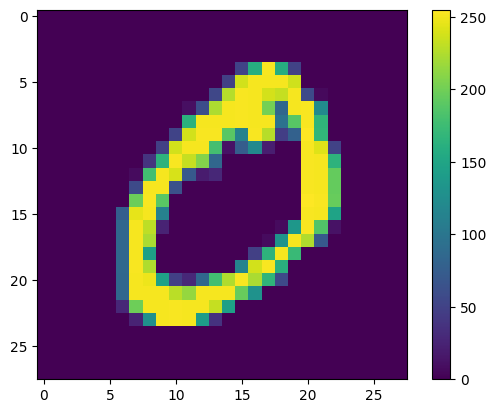

In [24]:
import matplotlib.pyplot as plt

print("Label is ", y_train[1])
# Display the array as an image
plt.imshow(x_train[1], cmap='viridis') 
plt.colorbar()                     
plt.show()


Label is  9


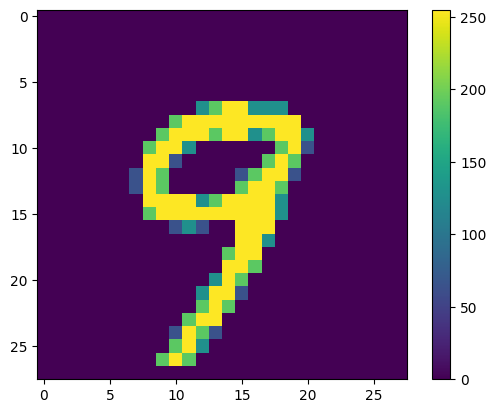

In [25]:
print("Label is ", y_train[183])
# Display the array as an image
plt.imshow(x_train[183], cmap='viridis') 
plt.colorbar()                     
plt.show()

Will choose number 3 for this experiment. 
So the steps are as follows
1. Choose examples of a specific number from dataset.
2. Add random noise to the image
3. Train the model with noisy image as inputs and no-noise image as labels

### Selecting 3s for training

In [27]:
x_train = x_train[y_train ==3]
x_test = x_test[y_test ==3]

### Normalizing the data of arrays

Dividing the arrays by maximum value

In [28]:
maxi = x_train.max()

In [29]:
x_train = x_train.astype('float32')/maxi
x_test = x_test.astype('float32')/maxi

### Flattening the arrays to use them as inputs to neural network

In [37]:
x_train.shape

(6131, 28, 28)

In [36]:
flattened_length_train = x_train.shape[1]*x_train.shape[2]
flattened_length_test = x_test.shape[1]*x_test.shape[2]

In [39]:
x_train = x_train.reshape(len(x_train),flattened_length_train)
x_test = x_test.reshape(len(x_test),flattened_length_test)

In [40]:
print(x_train.shape)
print(x_test.shape)

(6131, 784)
(1010, 784)


### Adding noise to the data

In [43]:
noise_factor = 0.2
x_train_noisy = x_train + (noise_factor * np.random.normal(loc=0, scale=1, size=x_train.shape))
x_test_noisy = x_test + (noise_factor * np.random.normal(loc=0, scale=1, size=x_test.shape))

In [53]:
x_train_noisy[0][:50]

array([ 0.25501652,  0.38827659, -0.05921872, -0.00202253, -0.28679961,
       -0.38180652, -0.0373184 , -0.15049463, -0.1964313 , -0.2082398 ,
        0.09076577, -0.20526394,  0.10721902, -0.32077403,  0.08265798,
        0.01176172,  0.13317424,  0.05048491, -0.07577155, -0.09268861,
       -0.06243284, -0.18485439,  0.21743747, -0.33269563, -0.0544138 ,
        0.12362537, -0.04808185, -0.46007396,  0.12878055,  0.14669705,
       -0.1825684 ,  0.30402988, -0.06014167, -0.10722327, -0.09134545,
        0.37318757,  0.13896702, -0.21993554, -0.09866815, -0.40129975,
        0.21717446, -0.18014124, -0.07644512, -0.27553313, -0.03765839,
       -0.02586485,  0.41805923, -0.37864848, -0.204611  , -0.21811071])

### Clipping the data to ensure upper and lower limits

In [54]:
x_train_noisy = np.clip(x_train_noisy,0.,1.)
x_test_noisy = np.clip(x_test_noisy,0.,1.)

### Visualizing the noisy data

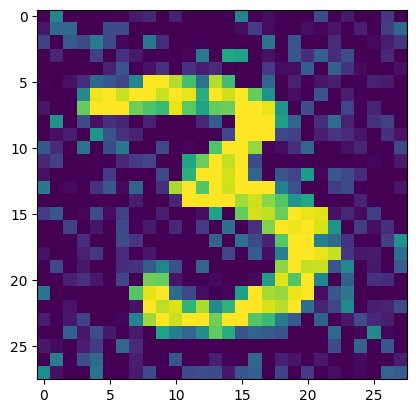

In [55]:
plt.imshow(x_train_noisy[2].reshape(28,28))

### Building the AutoEncoder 

In [61]:
#Input
input_layer = layers.Input(shape=(784,))

#Encoder
encoder = layers.Dense(128,activation="relu")(input_layer)

#Decoder
output = layers.Dense(784,activation="sigmoid")(encoder)

# Model
autoencoder = models.Model(input_layer,output)
autoencoder.compile(optimizer='adam',loss='mse')

### Training the AutoEncoder

In [64]:
autoencoder.fit(x_train_noisy, x_train,epochs=100,batch_size=128, verbose=0)

### Validation

In [65]:
decoded_images = autoencoder.predict(x_test_noisy)

32/32 [==============================] - 0s 1ms/step


### Visualize the results

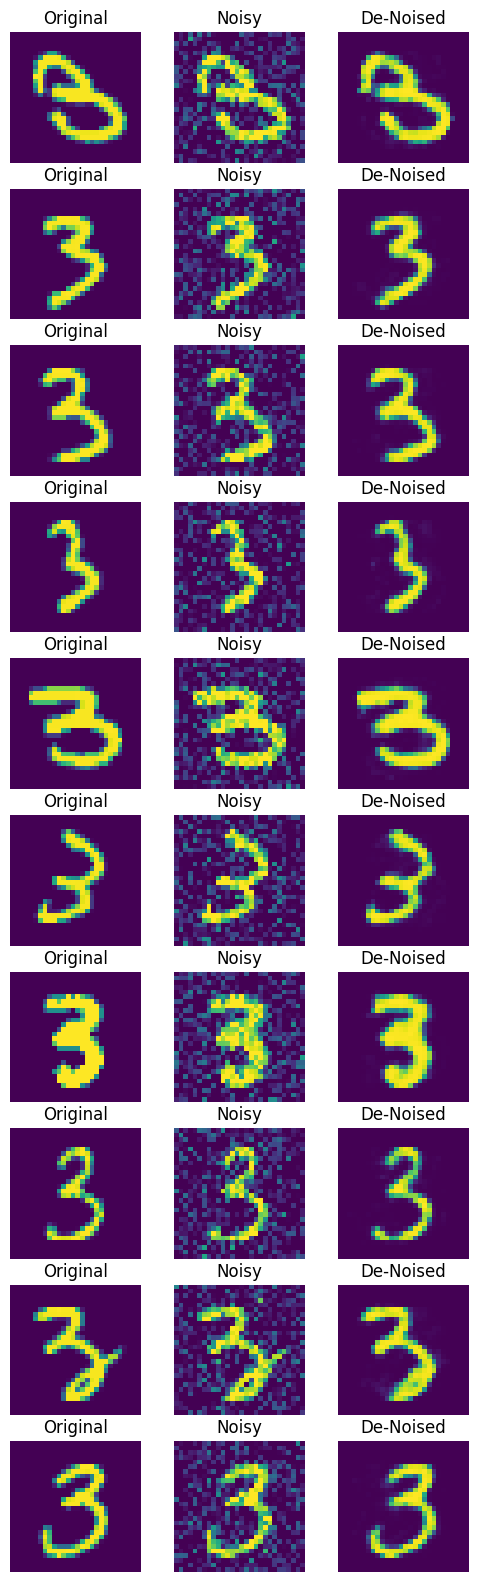

In [70]:
n = 10 
plt.figure(figsize=(6,20))
for i in range(10):
    
    plt.subplot(10,3,3*i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.title("Original")
    plt.axis("off")

    plt.subplot(10,3,3*i+2)
    plt.imshow(x_test_noisy[i].reshape(28,28))
    plt.title("Noisy")
    plt.axis("off")

    plt.subplot(10,3,3*i+3)
    plt.imshow(decoded_images[i].reshape(28,28))
    plt.title("De-Noised")
    plt.axis("off")

### Adding much higher noise to the data

In [71]:
noise_factor = 0.8 # Increased this factor
x_train_noisy = x_train + (noise_factor * np.random.normal(loc=0, scale=1, size=x_train.shape))
x_test_noisy = x_test + (noise_factor * np.random.normal(loc=0, scale=1, size=x_test.shape))

In [72]:
x_train_noisy[0][:50]

array([ 1.0856764 , -0.56866745,  1.72959583,  0.06092512,  1.09475658,
        0.22897614,  0.86456367, -0.04590417, -1.421312  , -0.82591725,
        0.14110277, -0.49500852,  1.32151723, -1.01027654,  1.14140342,
       -0.95826746,  0.30980237,  1.23771047, -0.14529979, -0.19137167,
        1.13201832,  0.89993533, -0.43460092,  1.39605118, -0.89878313,
       -0.28325205, -0.89918743, -0.06691879, -0.69951849, -0.03062249,
       -1.3679171 ,  0.38552687, -0.09564665, -0.19300932, -0.04832233,
       -0.07420135,  0.52430963,  1.43405681, -0.32218546, -2.01321305,
       -0.49098958,  0.9655052 , -0.40975039,  0.72384424,  0.20899007,
        0.48503687,  0.31397919,  0.33836687, -0.45557184, -0.80046898])

### Clipping the data to ensure upper and lower limits

In [73]:
x_train_noisy = np.clip(x_train_noisy,0.,1.)
x_test_noisy = np.clip(x_test_noisy,0.,1.)

### Visualizing the noisy data

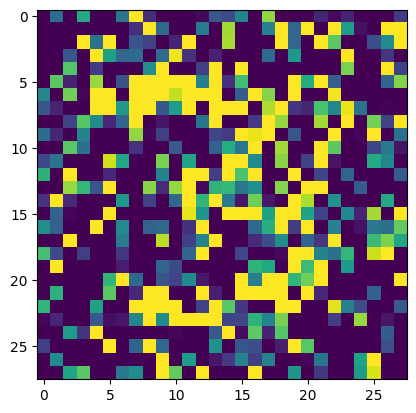

In [74]:
plt.imshow(x_train_noisy[2].reshape(28,28))

### Building the AutoEncoder 

In [75]:
#Input
input_layer = layers.Input(shape=(784,))

#Encoder
encoder = layers.Dense(128,activation="relu")(input_layer)

#Decoder
output = layers.Dense(784,activation="sigmoid")(encoder)

# Model
autoencoder = models.Model(input_layer,output)
autoencoder.compile(optimizer='adam',loss='mse')

### Training the AutoEncoder

In [76]:
autoencoder.fit(x_train_noisy, x_train,epochs=100,batch_size=128, verbose=0)

### Validation

In [77]:
decoded_images = autoencoder.predict(x_test_noisy)

32/32 [==============================] - 0s 972us/step


### Visualize the results

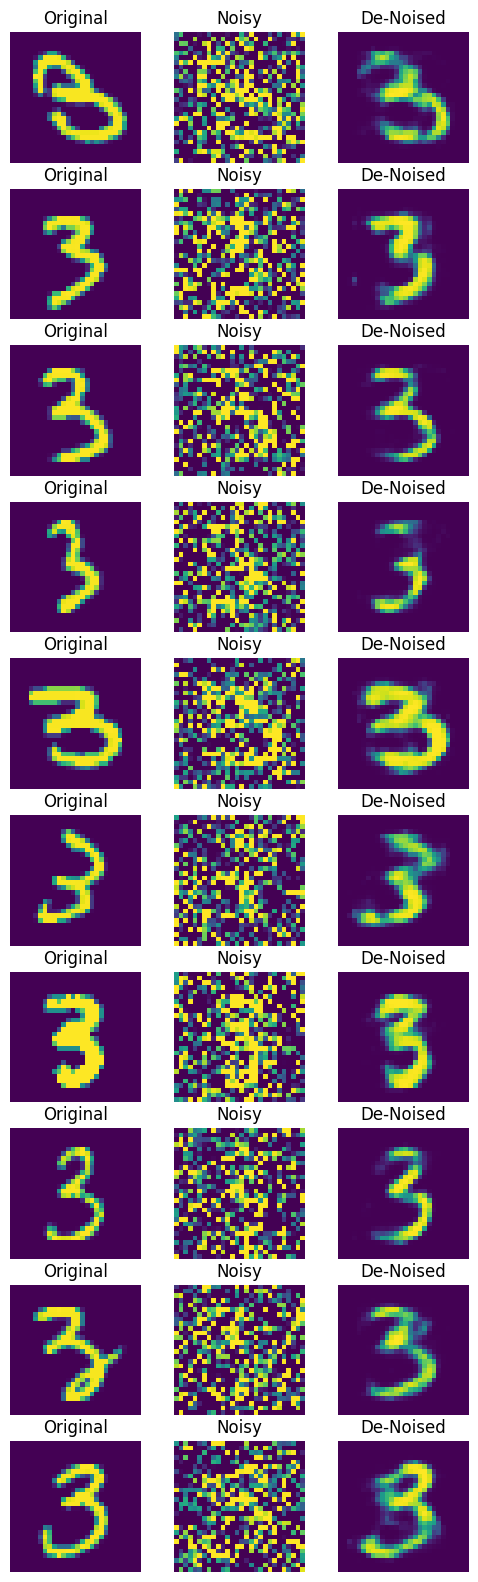

In [78]:
n = 10 
plt.figure(figsize=(6,20))
for i in range(10):
    
    plt.subplot(10,3,3*i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.title("Original")
    plt.axis("off")

    plt.subplot(10,3,3*i+2)
    plt.imshow(x_test_noisy[i].reshape(28,28))
    plt.title("Noisy")
    plt.axis("off")

    plt.subplot(10,3,3*i+3)
    plt.imshow(decoded_images[i].reshape(28,28))
    plt.title("De-Noised")
    plt.axis("off")

Digits almost invisible to naked eye is getting de-noised with a single hidden layer AutoEncoder